# 첫번째 머신 러닝 프로그램

## 생선 분류 문제
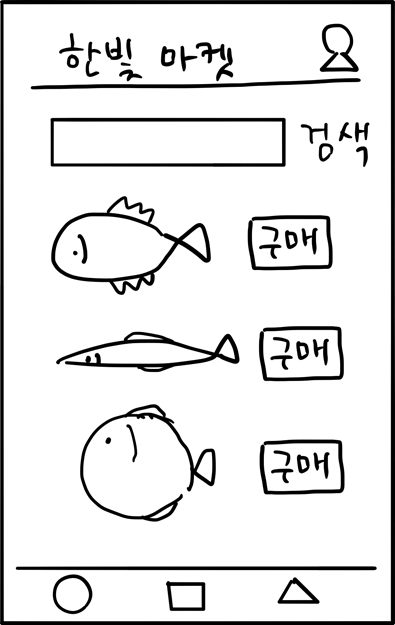


- 온라인 수산물 주문 프로그램에서 생선의 정보를 입력하면 생선 이름을 알려주는 프로그램을 만들어 보자
- 즉, 마켓에 들어온 생선의 크기 정보를 입력하면 자동으로 생선이름 알려주는 프로그램
    - EX. 도미에 대한 정보안다면? "30~40cm 길이의 생선은 도미" 라고 출력
        - 만약 시스템이 스스로 기준을 찾게하려면? 
        
        
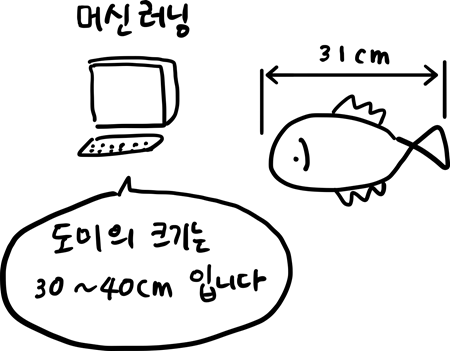

- 고전적인 프로그램

In [2]:
fish_lengths = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]

# 도미의 길이는 30cm가 넘어요 라는 정보가 있어서
for fish_length in fish_lengths : 
    if fish_length > 30 :
        print('도미')
    else :
        print('도미가 아님')


도미가 아님
도미가 아님
도미가 아님
도미가 아님
도미가 아님
도미가 아님
도미가 아님
도미가 아님
도미가 아님
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미
도미


- 30cm보다 크면 무조건 도미일까?
    - 고래와 새우처럼 아주 큰 절대적이 차이가 있지 않는 한 절대기준을 정하기는 어려움
    - 머신러닝은 주어진 데이터에서 스스로 기준을 찾는 기법

## 도미 vs 빙어 분류하기
- 판매되는 생선은 도미와 빙어 두 종류만 있음
- 2개의 클래스(분류값, 도미/빙어 두개 중 하나로 분류)
    - 이진 분류

### 도미 데이터 준비하기
- 생선을 분류할때 길이 정보 뿐 아니라 무게 정보도 같이 사용하는 것을 알았다고 가정
    - 무게와 길이 정보를 함께 사용

In [4]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0] #도미 길이
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0] #도미 무게

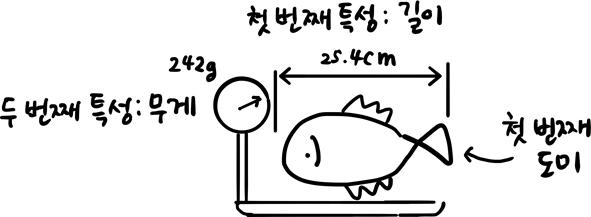

- 도미의 길이, 무게는 도미의 특징을 나타내는 특성(feature)라고 함
    - 통계학에서는 변수라고 부름
    
    
- 특성은 데이터를 표현하는 하나의 성질

**[참고] 데이터 유형**

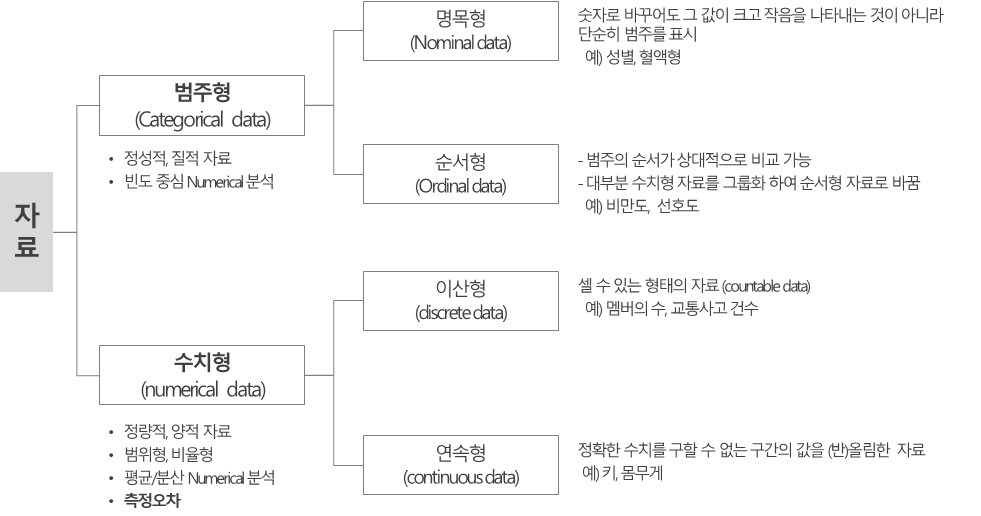

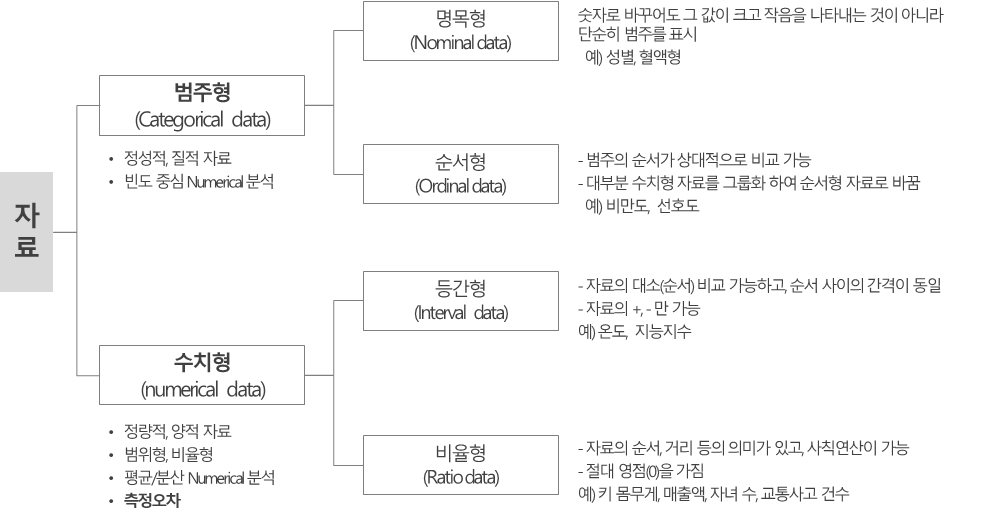


**[참고] 변수 유형**
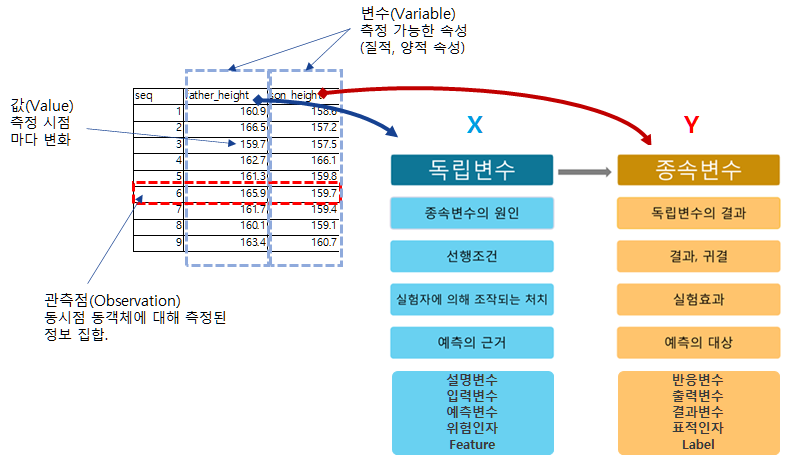

### 두 특성을 그래프로 표현
- tip. 그래프 표현이 데이터의 이해를 높인다

- 도미 길이와 무게 데이터에 대한 산점도 표시

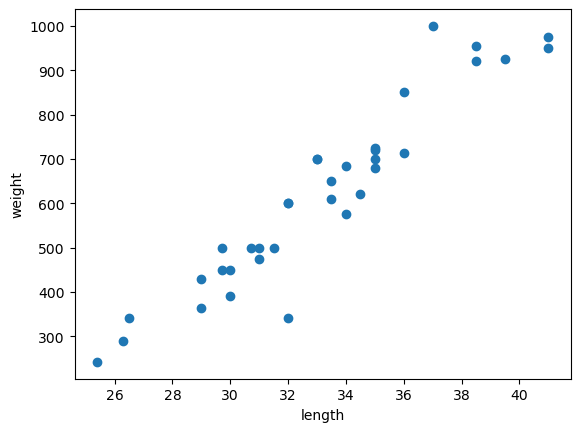

In [5]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- 생선의 길이가 길수록 무게가 많이 나가는 모양 => 선형적 관계
    - 선형적 : 그래프가 일직선에 가까운 모양일 때

### 빙어 데이터 준비하기
- 빙어는 도미에 비해 크기도 작고 무게도 가벼움

In [6]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

- 그래프(산점도)로 표현

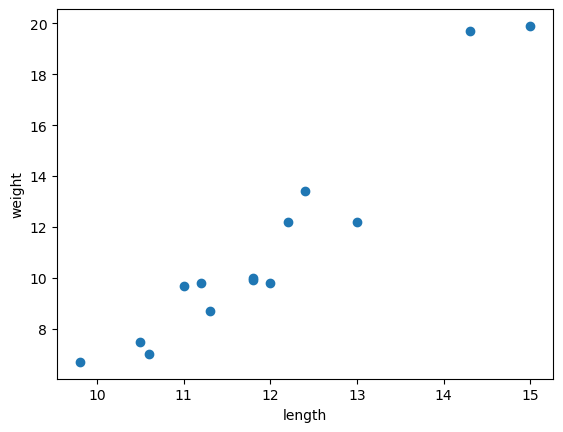

In [7]:
import matplotlib.pyplot as plt

plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

### 도미 데이터와 빙어 데이터 병합한 산점도
- 두개의 생선에 대한 정보를 한 그래프로 표현하면 두 생선의 차이 등을 한번에 확인 할 수 있다

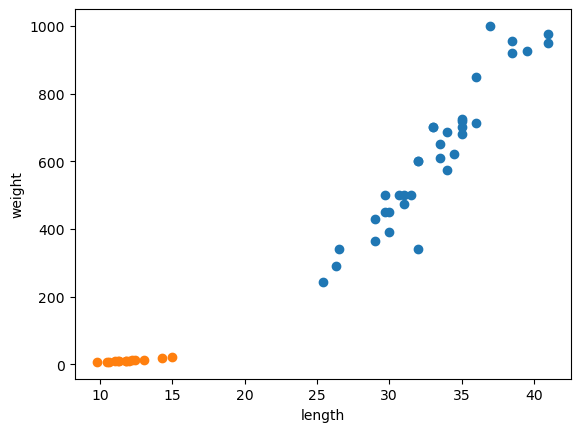

In [8]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- 도미는 길이가 늘어나면 무게도 늘어나지만, 빙어는 길이가 늘어도 무게가 많이 늘어나지는 않는다

## 첫 번째 머신러닝 프로그램

- 머신러닝을 가능하게 하는 알고리즘은 많은 시간을 거쳐서 완성되어 왔고, 또 많은 이론들이 발표되고 있음
    - 그 중에서 몇 알고리즘들은 검증되어져서 실제 사용할 수 있는 알고리즘들이며 머신러닝을 배운다는 것은
        - 발표되어 알려지고 여러 연구 및 기업에서 실제 사용해 검증된 알고리즘들의 개념을 배우고 활용법을 배우는 것임
        - 머신러닝 및 딥러닝의 결과물을 모델링이라고 하는데
            - 이 모델링은 여러 모델(알려진 알고리즘)을 하나의 데이터로 셋팅해서 테스트 하고 성능을 평가한 후 가장 성능이 좋은 모델을 찾아내는 과정임
            - 머신러닝 및 딥러닝은 100%의 예측을 목표로 하는 것이 아니고 가장 성능이 좋은 예측율이 높은 모델링을 찾아내는 것이 목표임
            - 머신러닝, 딥러닝은 **오류를 인정하고 오류를 최소화 하는것** 이 목표이다.

- 본 수업은 러닝을 위한 알고리즘들이 그 결과를 내는 계산법(수학공식) 자체를 배우는 것이 아님. 해당 공식의 결과가 의미하는 바를 배우게 됨

- 파이썬 패키지에는 머신 러닝을 위한 많은 패키지들이 준비되어 있음
    - 그 중에서 가장 많이 알려진 Scikit-learn 패키지를 이용하여 머신러닝 알고리즘 사용법을 배우게 됨
        - Scikit-learn 
            - 파이썬 프로그래밍 언어용 자유 소프트웨어 기계 학습 라이브러리임
            - 다양한 분류, 회귀, 그리고 서포트 벡터 머신, 랜덤 포레스트, 그라디언트 부스팅, k-평균, DBSCAN을 포함한 클러스터링 알고리즘을 라이브러리로 갖고 있음
            - 파이썬의 수치 및 과학 라이브러리 NumPy 및 SciPy와 함께 운용되도록 설계되었음

###  k-최근접 이웃 알고리즘을 사용한 도미와 빙어 데이터 분류
- 알려진 알고리즘 : k-최근접 이웃 알고리즘
- 지도학습, 분류

#### 두 생선 데이터 병합하여 데이터 준비
- 머신러닝은 분류하고자 하는 두 생선의 여러 샘플(도미와 빙어들의 몸무게 + 길이)을 알고리즘(클래스로 구성되어 있음)에 주입(입력)하여 해당 샘플들을 학습(특성을 찾는것)시켜 기준을 만들어내는 것임
    - 학습에 사용되는 계산식이 알고리즘이고, k-최근접 이웃 알고리즘을 사용

In [9]:
# 두 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

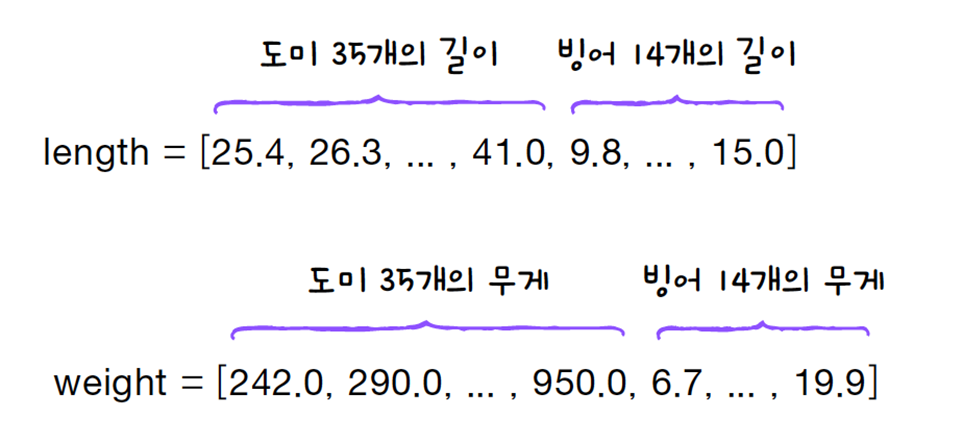

In [17]:
# 생선 한마리당 길이,몸무게 로 정보를 정리
# zip 함수(두 집합 자료에 대하여, 같은 index의 값을 묶어 튜플로 반환)
test = zip(length, weight)
for i, j in test :
    print([i,j])

[25.4, 242.0]
[26.3, 290.0]
[26.5, 340.0]
[29.0, 363.0]
[29.0, 430.0]
[29.7, 450.0]
[29.7, 500.0]
[30.0, 390.0]
[30.0, 450.0]
[30.7, 500.0]
[31.0, 475.0]
[31.0, 500.0]
[31.5, 500.0]
[32.0, 340.0]
[32.0, 600.0]
[32.0, 600.0]
[33.0, 700.0]
[33.0, 700.0]
[33.5, 610.0]
[33.5, 650.0]
[34.0, 575.0]
[34.0, 685.0]
[34.5, 620.0]
[35.0, 680.0]
[35.0, 700.0]
[35.0, 725.0]
[35.0, 720.0]
[36.0, 714.0]
[36.0, 850.0]
[37.0, 1000.0]
[38.5, 920.0]
[38.5, 955.0]
[39.5, 925.0]
[41.0, 975.0]
[41.0, 950.0]
[9.8, 6.7]
[10.5, 7.5]
[10.6, 7.0]
[11.0, 9.7]
[11.2, 9.8]
[11.3, 8.7]
[11.8, 10.0]
[11.8, 9.9]
[12.0, 9.8]
[12.2, 12.2]
[12.4, 13.4]
[13.0, 12.2]
[14.3, 19.7]
[15.0, 19.9]


- 사잇킷런이 원하는 데이터 형태
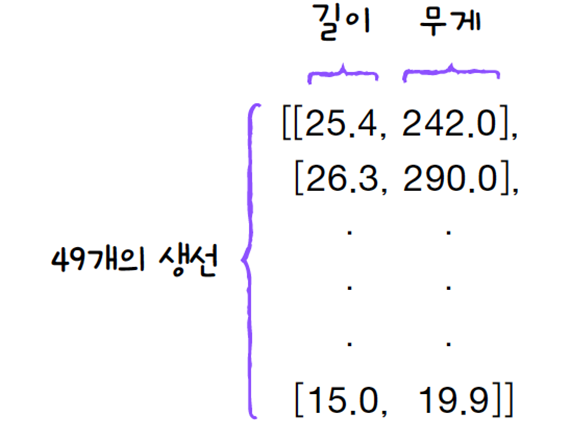

In [18]:
# sk-learn 패키지가 원하는 형태로 데이터 구조 변환
# 2차원 리스트로 변환
fish_data = [[l,w] for l,w in zip(length,weight)]
# 생선 한마리의 특성들을 list의 원소로 갖게됨

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 타겟(레이블) 데이터 생성
- 지도학습이므로 각 생선이 도미인지 빙어인지 구분하는 값이 있어야 학습을 진행 할 수 있음
    - 찾으려는 대상을 1로 놓고 나머지 대상은 0으로 놓는다
    - 예제는 도미를 찾는것이 목표이므로 도미를 1로 빙어를 0으로 설정
        - 단, 이진(두개 중 하나를 찾는 것)분류 이므로 0으로 예측하면 빙어로 예측한 것이 된다

In [19]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-최근접 이웃(K-Nearest Neighbor) 알고리즘을 이용한 분류

### K-최근접 이웃(K-Nearest Neighbor) 알고리즘 소개

- 테스트 데이터와 K개 훈련데이터의 y값들을 비교
- 분류와 회귀 모두 활용
    - 분류 : k개 최근접 이웃들의 class들 중 다수결 결과로 class 예측
    - 회귀 : k개 최근접 이웃들이 가지고 있는 값의 평균을 결과값으로 예측
    
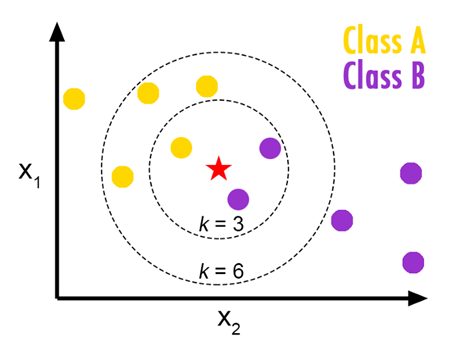


- 비모수방식
    - 모수방식 : 알려진 확률분포(정규분포, 이항분포 등)를 기반으로 해당 모수를 추정
    - 비모수방식 : 알려진 확률분포를 기반하지 않고 다른 방식으로 해당 모수를 추정


- 구체적인 데이터를 가지고 예측을 요청할 때, K개 가장 가까운 사례를 train data set에서 찾아 해당하는 데이터의 y 값을 기반으로 예측 결과를 제시


- K 값 : 동점을 막기 위해 대개 홀수로 정함 
    - k가 작으면 이상치 등 노이즈에 민감하게 반응하여 과대적합 
        - k=1인 경우 가장 가까운 이웃과 같은 클래스가 할당됨
    - k가 크면 자료의 패턴을 파악할 수 없어 과소적합
        - k=N인 경우 전체 평균의 개념

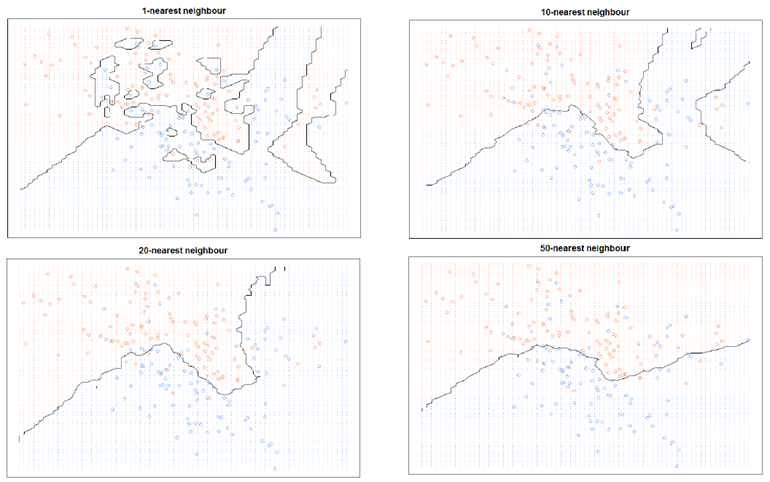
https://imgur.com/6Ub8CXe

        
- '가깝다'는 판단 기준 : **거리** (맨하탄 거리, 유클리디안 거리 등)
    - 맨하탄 거리 : 
        - 그냥 평면위에서 (x1, y1)과 (x2, y2)사이의 맨하탄 거리를 계산하는 공식은 
            - |x1-x2| + |y1-y2|  :  x끼리 차이의 절대값 + y끼리 차이의 절대값
            - 아래 그림에서 빨강, 노랑, 파랑색 모두 맨하탄 거리
            - 좌표가 아니라 도시라고 생각을 해보자, 도시가 유클리드 거리를 연산하는 것처럼 뻥 뚫려 있을리가 없다. 
                - 그렇기 때문에 현실적인 거리를 구해야 하는데 건물이 위 이미지 모양처럼 있다면 우리는 가장 가까운 거리는 대부분 파란색이라 착각할 수 있다. 왜냐하면 최단거리인 초록색과 가장 인접해 있기 때문이다.

            - 하지만, 파란색과 노란색과 붉은색 선들은 모두 총길이가 같다는 함정이 있다. 
                - 이것이 바로 맨하탄 거리이다. 
        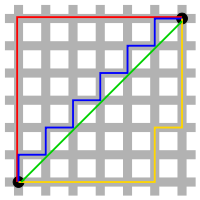

- 유클라디안 거리 :
     - 위 그림에서 초록색 거리가 유클리디안 거리(두 지점의 가장 짧은 거리)
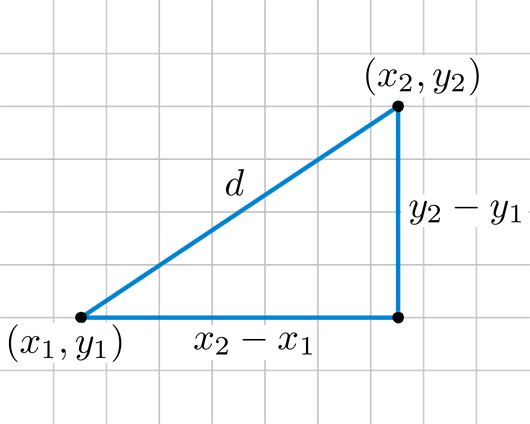




출처: https://dyndy.tistory.com/158


### 사이킷런의 K-최근접이웃 클래스

In [20]:
from sklearn.neighbors import KNeighborsClassifier

1. **KNeighborsClass 객체 생성**

In [22]:
# 패키지내의 모든 모듈은 기본값을 갖고 있음
# 파라미터 설정을 하지 않아도 학습과 테스트가 가능함
# - 기본 파라미터는 데이터가 양질이라면 좋은 성능을 낼 수 있는 값으로 설정되어 있음
# 빈 모델 생성(기본값 사용)
kn = KNeighborsClassifier()

2. **훈련(training) : fit(features, label) 메서드**
    - 도미를 찾기위한 기준을 학습시킴

In [23]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

**모델 평가 : score() 메서드 => 정확도**

In [24]:
kn.score(fish_data, fish_target)

C:\Users\a\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

- 준비된 학습데이터(특성,라벨)를 통해 학습을 진행 : 학습된 모델 kn 생성
- 모델평가(성능평가) : 학습데이터를 통해 평가를 진행
    - 정확도가 100%(과적합을 의심해야 함)
    - 학습데이터로만 좋은 성능을 나타내는 경우
        - 학습시 평가 데이터를 모두 확인한 상태
        - 평가할때 정답을 알고 있는 상태이므로 과적합이 발생했음
            - 좋은 모델로 평가할 수 없다(사용불가능한 모델임)

**정확도(accuracy)**

- 정확한 답을 몇개 맞추었는지를 백분율로 나타낸 값
- 정확히 맞힌 개수 / 전체 데이터수

- 위 모델은 모든 fish_data에 대해서 모든 fish_target을 정확히 맞춤
    - 정확도가 100%인 모델
    - 진짜 성능이 100%일까???????

### K-최근접 이웃 알고리즘을 이용한 새로운 데이터 분류
- 새로 생선 하나가 들어와서 이 생선이 도미인지 빙어인지를 알려달라고 함
    - 길이(30), 무게(600)에 대한 정보가 전달됨

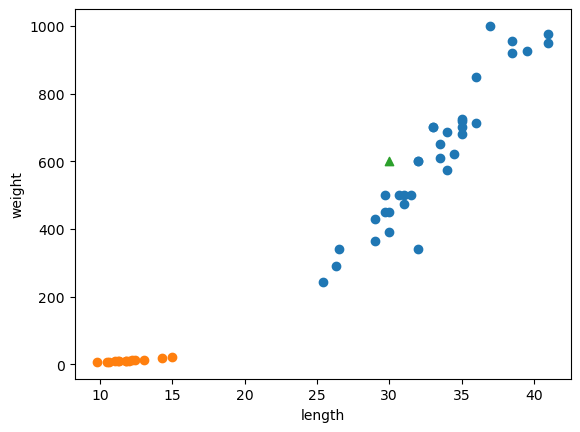

In [26]:
# 새로운 생선 30,600을 그래프에 표현해 보면
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600,marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()
# 도미로 판달할 수 있음

- 새로운 데이터로 어떤 생선인지 판단하기 위해서는
    - 모델객체의 predict() 함수를 사용한다
    - 새로운 데이터는 모델이 학습한 데이터와 같은 형태로 전달되어야 함
        - 사이킷런의 모델 알고리즘은 2차원 데이터를 요구한다

In [27]:
# 학습된 모델  : kn
# 데이터 : 2차원 배열(리스트)
# 새로운 생선 정보를 이용해 도미인지 빙어인지 분류 예측
new=[[30,600],[50,550],[5,20]]
kn.predict(new)

C:\Users\a\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0])

- 새로운 생선 3개를 각각 도미(1), 도미(1), 빙어(0) 으로 판단함

- 모델의 속성
    - **_fit_X  속성** : 학습에 사용한 data(fish_data)를 가지고 있음

In [28]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


- **_y 속성** : 학습에 사용한 결정값(classes값, fish_target) 을 가지고 있음

In [29]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


- k-최근접 이웃 알고리즘은
    - 학습 데이터를 모두 저장하고 있다가 새로운 데이터가 들어오면 새로운데이터로부터 직선거리에 어떤 데이터가 있는지 확인만 하면 됨(가장 간단한 알고리즘)
    - 단점 : 데이터가 아주 많은 경우라면???
        - 데이터를 보관하기 위해 아주 많은 메모리가 필요
        - 새로들어온 데이터로부터 기존에 저장한 데이터(학습데이터)들 까지의 거리를 계산하는데 시간이 많이 걸림

**K-neighbors 크기 지정**
- 몇개의 가까운 데이터를 참고하는지의 기준

In [32]:
# 49개의 데이터를 참고하자
# 데이터의 갯수 49
kn49 = KNeighborsClassifier(n_neighbors=49)

**K=49인 경우 모델 훈련 및 성능**

In [33]:
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

C:\Users\a\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7142857142857143

In [34]:
kn49.predict(new)

C:\Users\a\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1])

- **49개 중 도미가 35개 이므로 어떤 데이터를 넣어도 무조건 도미로 예측**
- why? **도미의 수가 더 많으므로**
- k-neighbors의 수를 높게 설정하는 것이 모델의 성능을 높이는 방법인가???
    - 49개로 잡았더니 성능이 떨어짐
    - 그럼 최적의 k-neighbors수는? 
        - 이런 값들을 찾는것이 모델링이며
        - 최적의 k-neighbors수가 얼마인지 정답은 없다. 평가지표(정확도)가 높게 나오는 어떤 숫자를 찾아내는것이 목표임
            - k-neighbors 파라미터 처럼 모델링을 하는 사람이 설정할 수 있도록 하는 파라미터를 **하이퍼 파라미터** 라고 한다

In [35]:
print(35/49)

0.7142857142857143


### [마무리]

- 특성
- k-최근접 이웃 알고리즘
- 정확도

### 핵심 패키지와 함수
**scikit-learn**

- KNeighborsClassifier()
- fit()
- predict()
- score()